# **Machine Learning from Data**

## Lab 2: Feature selection using PCA


2021 - Veronica Vilaplana - [GPI @ IDEAI](https://imatge.upc.edu/web/) Research group

-----------------

##Part2: The Phoneme dataset
##Classification using all the features or a manually selected subset of features

In [1]:
import pandas as pd             #import pandas with the alias pd
import numpy as np              #import numpy with the alias np
import seaborn as sns           #import seaborn with the alias sns
import scipy.stats as ss
import matplotlib.pyplot as plt #import matplotlib.pyplot with the alias plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

###Read dataset
Load the file "BD_phoneme.csv" to Colab

In [2]:
df = pd.read_csv("BD_phoneme.csv", header=None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Columns: 257 entries, 0 to 256
dtypes: float64(256), int64(1)
memory usage: 8.8 MB
None


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,9.04747,11.38065,11.61545,10.31166,12.14300,10.65254,11.19395,11.27878,11.13465,11.82706,12.81048,12.32239,10.27542,9.57760,10.62308,11.34983,11.58342,12.19465,10.67933,9.95300,11.47047,11.74805,11.28167,11.51648,12.50765,12.10918,11.97849,10.80743,9.65682,10.71985,9.50841,...,12.29207,12.57110,10.00457,12.09898,14.08718,13.97254,11.74888,13.23555,13.76750,13.53994,12.28767,13.48164,13.43467,11.43232,11.01716,13.02529,13.37422,7.72797,12.32757,13.37041,12.68903,13.41566,13.16755,13.62844,13.32554,12.46720,13.84955,10.83688,11.23451,13.19359,12.94519,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,5
1,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,20.15212,18.84739,19.35436,19.61419,20.32628,21.41752,20.14227,17.97866,16.32943,17.63076,16.51955,15.95348,16.77282,16.98819,18.32396,17.59234,15.94519,13.31152,15.36856,16.10275,14.76571,14.85925,11.89751,14.90796,15.49864,15.13160,14.41750,11.42785,14.15725,13.80756,14.41612,...,12.52542,11.56420,10.72840,11.34892,11.10939,9.53083,11.11848,11.27136,11.29874,10.02574,10.11055,7.53453,8.71152,9.58630,9.71517,9.29711,7.74722,10.07586,6.80730,7.99336,8.70087,6.50054,9.11663,4.95653,8.98125,7.78602,8.06256,7.46077,7.03316,7.93572,8.91567,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,4
2,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,12.05282,8.92333,7.23825,6.98416,7.50434,7.21911,6.10589,5.37987,5.69972,6.15451,8.33365,8.61714,6.58075,5.63212,4.57192,7.18243,7.64013,6.48067,6.51159,4.77806,6.32551,5.61790,5.93619,3.93011,5.45621,5.22023,5.68300,6.26205,7.25231,6.78937,5.98700,...,3.16328,4.25020,7.19742,7.27264,5.77017,5.66405,6.48652,5.99069,2.37876,5.10594,5.88512,5.65892,6.57863,4.45805,4.86107,5.52299,6.17580,6.20610,6.49488,6.79143,5.87053,6.65905,6.37389,4.16703,5.47719,5.43269,4.10159,3.91116,3.88583,5.83309,6.49345,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,3
3,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,10.47826,8.56676,8.97603,10.67954,9.67530,8.83348,8.43713,5.42489,6.46217,7.50640,3.71255,5.43962,7.34509,7.94968,7.08204,3.99006,4.51822,4.95940,4.61728,2.99881,4.09136,7.16309,6.73208,6.09821,6.09049,5.35111,7.51708,7.34681,6.55168,7.69089,8.40109,...,4.80601,6.87162,6.98889,5.83639,4.38529,5.09759,1.45570,4.44739,5.95291,5.73163,3.45180,4.49433,4.79405,5.97959,3.41728,5.65843,6.55074,5.15614,4.18213,4.95448,5.61000,5.15144,5.44564,4.74798,5.55902,2.88668,4.56161,5.62022,5.51356,5.95977,5.36506,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,3
4,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,17.40394,18.08701,17.78545,18.58141,18.26168,18.72958,19.56382,18.81372,19.77800,18.92736,21.83878,21.83288,20.81927,21.14635,17.96529,21.40177,20.30099,19.61594,19.58996,19.47810,17.59408,17.13690,18.10193,17.84130,18.00640,17.14704,17.84642,18.23249,18.65123,17.67551,18.56012,...,7.34476,6.45842,5.64810,8.47157,4.47899,8.38229,8.23281,8.35911,8.45261,8.27508,7.96965,9.42980,8.83366,6.59190,8.20029,8.89709,9.71158,9.85747,8.77021,9.17960,10.49989,9.99960,8.33319,9.29810,4.60656,7.58772,7.82380,6.96809,6.97810,8.91020,7.74256,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,1


###Prepare data, normalize in mean

In [4]:
X = np.array(df.iloc[:,0:256])
print(np.shape(X))
y = np.array(df.iloc[:,256])
print(np.shape(y))
# we use broadcasting for this:
# compute a vector of feature means and subtract it from each row in X
Xm = X.mean(axis=0)
X = X - Xm
nclass = 5
nfft = 256

(4509, 256)
(4509,)


### Plot spectrum

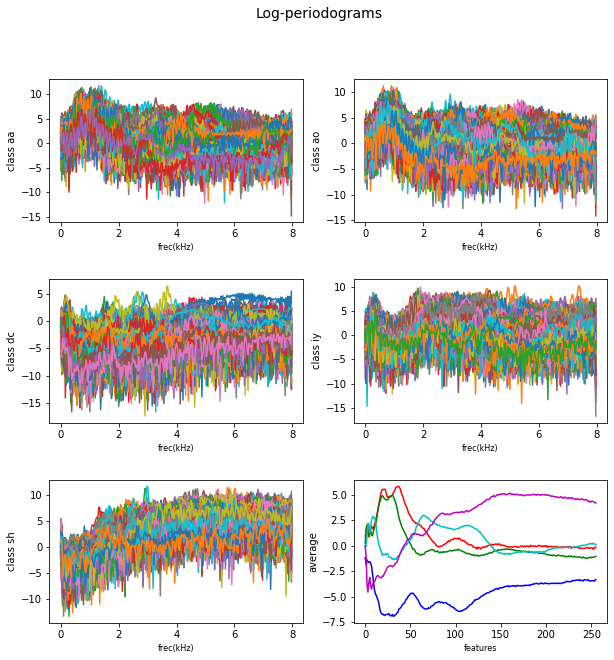

In [5]:
classes = ['aa','ao','dc','iy','sh']
colors = ['r','g','b','c','m']

fmax = 8*nfft/256
freqax = np.array(range(0,nfft))*fmax/nfft
xdm = np.zeros((nclass,nfft))
fig, ax = plt.subplots(figsize=(10,10), nrows= 3, ncols=2)
fig.suptitle('Log-periodograms', fontsize=14)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for idc, nc in enumerate(classes):
  index = y== (idc+1)
  xd = X[index,0:nfft]
  xdm[idc,:] = xd.mean(axis=0)
  plt.subplot(3,2,idc+1)
  for ids in range(0,len(xd)):
    plt.plot(freqax,xd[ids,:])
    plt.xlabel('frec(kHz)', fontsize=8)
    plt.ylabel('class ' + nc)

plt.subplot(3,2,nclass+1)
for idc, nc in enumerate(classes):
  plt.plot(np.array(range(0,nfft)),xdm[idc,:],color=colors[idc])
  plt.xlabel('features', fontsize=8)
  plt.ylabel('average')


plt.show()

###Feature selection
Initially select the first 64 features

In [6]:
# Select the number of features to use (initially the first 64 features)
V_coor = np.array(range(0,64))
nfeat  = len(V_coor)
print(nfeat)

# Feature selection
X = X[:,V_coor]
print(X.shape)

64
(4509, 64)


###Dataset partition into training and test sets

In scikit-learn a random split into training and test sets can be computed with the `train_test_split` helper function.
We define the `train_size`. It should be between 0.0 and 1.0 and represents the proportion of the dataset to include in the train split.The `test_size` value is set to the complement of the train size. `shuffle` is a boolean indicating whether or not to shuffle the data before splitting. If `stratify` is not None, data is split in a stratified fashion, using this as the class labels.

In [7]:
# Split dataset (feature vectors and labels) into training and testing subsets
# shuffle data first, and do stratified sampling, keeping class proportions in the subsets
trainsize= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= trainsize, random_state=5, shuffle=True, stratify = y)

###LDA and QDA classifiers
We train a linear and a quadratic classifier and show error and confusion matrices on the train and on the test sets.

In [ ]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd",store_covariance=True)
ldamodel = lda.fit(X_train, y_train)
y_tpred_lda = ldamodel.predict(X_train)
y_testpred_lda = ldamodel.predict(X_test)


lda_train_error = 1. - accuracy_score(y_train,y_tpred_lda)
print('LDA train error: %f' %lda_train_error)
print('LDA train confusion matrix:')
print(confusion_matrix(y_train,y_tpred_lda))

lda_test_error = 1. - accuracy_score(y_test,y_testpred_lda)
print('LDA test error: %f' %lda_test_error)
print('LDA test confusion matrix:')
print(confusion_matrix(y_test,y_testpred_lda))

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qdamodel = qda.fit(X_train, y_train)
y_tpred_qda = qdamodel.predict(X_train)
y_testpred_qda = qdamodel.predict(X_test)

qda_train_error = 1. - accuracy_score(y_train,y_tpred_qda)
print('QDA train error: %f' %qda_train_error)
print('QDA train confusion matrix:')
print(confusion_matrix(y_train,y_tpred_qda))

qda_test_error = 1. - accuracy_score(y_test,y_testpred_qda)
print('QDA test error: %f' %qda_test_error)
print('QDA test confusion matrix:')
print(confusion_matrix(y_test,y_testpred_qda))


###Now we repeat the previous analysis using only two features manually selected
Manually select two features, you can use the spectrum plots to try to find the most discriminative ones.

In [ ]:
# Select the number of features to use (initially the first 64 features)
#V_coor = np.array(range(0,64))
V_coor = [10, 30]
nfeat  = len(V_coor)
print(nfeat)
# Feature selection
X = X[:,V_coor]
print(X.shape)

# Split dataset (feature vectors and labels) into training and testing subsets
# shuffle data first, and do stratified sampling, keeping class proportions in the subsets
trainsize= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= trainsize, random_state=5, shuffle=True, stratify = y)

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd",store_covariance=True)
ldamodel = lda.fit(X_train, y_train)
y_tpred_lda = ldamodel.predict(X_train)
y_testpred_lda = ldamodel.predict(X_test)


lda_train_error = 1. - accuracy_score(y_train,y_tpred_lda)
print('LDA train error: %f' %lda_train_error)
print('LDA train confusion matrix:')
print(confusion_matrix(y_train,y_tpred_lda))

lda_test_error = 1. - accuracy_score(y_test,y_testpred_lda)
print('LDA test error: %f' %lda_test_error)
print('LDA test confusion matrix:')
print(confusion_matrix(y_test,y_testpred_lda))

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qdamodel = qda.fit(X_train, y_train)
y_tpred_qda = qdamodel.predict(X_train)
y_testpred_qda = qdamodel.predict(X_test)

qda_train_error = 1. - accuracy_score(y_train,y_tpred_qda)
print('QDA train error: %f' %qda_train_error)
print('QDA train confusion matrix:')
print(confusion_matrix(y_train,y_tpred_qda))

qda_test_error = 1. - accuracy_score(y_test,y_testpred_qda)
print('QDA test error: %f' %qda_test_error)
print('QDA test confusion matrix:')
print(confusion_matrix(y_test,y_testpred_qda))


###Scatter plot and decision boundaries for 2 features

In [ ]:
# For the linear model

# coef_ : shape of (n_classes, n_features)
# intercept_ :  shape of (n_classes,)

# Plot the hyperplanes: one vs all 
fig, ax = plt.subplots(figsize=(8,12))

nclass = 5
classes = ['aa','ao','dc','iy','sh']
colors = ['r','g','b','c','m']

for l,c, m in zip(np.unique(y),colors,['s','x','o','+','s']):
    plt.scatter(X[y==l,0],
                X[y==l,1],
                c=c, marker=m,label='class %d' %l, alpha=0.3)
# marker=m
x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])

# lines for class 0
for i, c in enumerate(colors):
    b, w1, w2 = lda.intercept_[i], lda.coef_[i][0], lda.coef_[i][1]
    y1 = -(b+x1*w1)/w2    
    plt.plot(x1,y1,c=c)
    
plt.title("Scatter plot with decision boundaries") 
plt.legend()
plt.show()

###Now plot the region boundaries


In [ ]:
# For the lineal and quadratic models

h = .1 # step size in the mesh

colors = ['r','g','b','c','m']
classes = ['aa','ao','dc','iy','sh']

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots(figsize=(14,7),nrows=1, ncols=2)

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Plot also the training points
for idc, nc in enumerate(classes):
  idx = y== (idc+1)
  ax[0].scatter(X[idx,0], X[idx,1], color = colors[idc], label='class %d' %idc,alpha=0.7); 
  
ax[0].contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.2)

ax[0].set_xlim(xx.min(), xx.max())
ax[0].set_ylim(yy.min(), yy.max())
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('LDA boundaries')

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Plot also the training points
for idc, nc in enumerate(classes):
  idx = y== (idc+1)
  ax[1].scatter(X[idx,0], X[idx,1], color = colors[idc], label='class %d' %idc,alpha=0.7);

ax[1].contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.2)

ax[1].set_xlim(xx.min(), xx.max())
ax[1].set_ylim(yy.min(), yy.max())
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_title('QDA boundaries')

plt.show()
